In [1]:
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config2 import api_key
from config2 import gkey
from pprint import pprint
from pandas_function import make_df
import gmaps


#NOTE: If you don't want to run all of the queries (which takes time), skip down to the part where
#you read the saved .csvs of all of the queries.

In [6]:
#Source: https://ceoworld.biz/2018/07/16/these-are-the-worlds-top-300-most-populous-cities-2018/
#Unfortunately, I had to hardcode all of these cities, which was a pain. Hopefully I can find
#a quick and easy webscraping method in the future.

city_list =[['Shanghai', 'China', 34000000],
['Beijing', 'China',18590000],
['Karachi', 'Pakistan',18000000],
['Istanbul', 'Turkey', 14657000],
['Dhaka', 'Bangladesh', 14543000],
['Tokyo', 'Japan', 13617000],
['Moscow', 'Russia', 13197596],
['Manila', 'Philippines',12877000],
['Tianjin', 'China',12784000],
['Mumbai', 'India', 12400000],
['Sao Paulo', 'Brazil', 12038000],
['Shenzhen', 'China', 11908000],
['Guangzhou', 'China', 11548000],
['Delhi', 'India', 11035000],
['Wuhan', 'China', 10608000],
['Lahore', 'Pakistan', 10355000],
['Seoul', 'South Korea', 10290000],
['Chengdu', 'China', 10152000],
['KINSHASA', 'Congo D.R.',10125000],
['Lima', 'Peru', 9752000],
['Jakarta', 'Indonesia', 9608000],
['Cairo', 'Egypt', 9500000],
['Mexico City', 'Mexico', 8919000],
['Tehran', 'Iran', 8847000],
['Baghdad', 'Iraq', 8765000],
['Xian', 'China', 8705000],
['London', 'UK', 8674000],
['New York', 'USA', 8550000],
['Nanjing', 'China', 8460000],
['Bangalore', 'India', 8444000],
['Ho Chi Minh City', 'Vietnam', 8426000],
['Bangkok', 'Thailand', 8281000],
['Chongquin', 'China', 8165500],
['BOGOTA', 'Colombia', 8081000],
['Lagos', 'Nigeria', 8048000],
['RIYADH', 'Saudi Arabia', 7506000],
['Hong Kong', 'China', 7234800],
['Chennai', 'India', 7088000],
['Hangzhou', 'China', 7082000],
['Hyderabad', 'India', 6809000],
['Rio de Janeiro', 'Brazil', 6454000],
['Zhengzhou', 'China', 6406000],
['Shenyang', 'China', 6255000],
['Qingdao', 'China', 6188000],
['Santiago','Chile',6158000],
['Dalian','China', 5900000],
['Singapore', 'Singapore', 5607000],
['Ahmadabad', 'India', 5577000],
['Suzhou', 'China', 5468000],
['St Petersburg', 'Russia', 5323000],
['Los Angeles', 'California', 4000000]]
city_df = pd.DataFrame(city_list, columns=['City', 'Country', 'Population'])

#We just want City and Population as a DataFrame that we can add Population to later.
del city_df['Country']
city_df.head()

,City,Population
0,Shanghai,34000000
1,Beijing,18590000
2,Karachi,18000000
3,Istanbul,14657000
4,Dhaka,14543000


In [7]:
#We format our list so that international cities are formatted ['city', 'city', 'country'].
#I did this because in most cases I don't know what "state" a particular international city is in.
#However, there are cities like 'Beijing' which is its own province. When I first started this,
#I was under the impression that all international cities were formatted like this, but this is
#definitely not the case.

pull_city_list = []
for city in city_list:
    one = city[0]
    #Doesn't do this formating if the city is New York City in the USA.
    if city[1] == 'USA':
        two = 'New York' 
        three = city[2]
    else:
        two = city[0]
        three = city[1]
    pull_city_list.append([one, two, three])

pull_city_list

[['Shanghai', 'Shanghai', 'China'],
 ['Beijing', 'Beijing', 'China'],
 ['Karachi', 'Karachi', 'Pakistan'],
 ['Istanbul', 'Istanbul', 'Turkey'],
 ['Dhaka', 'Dhaka', 'Bangladesh'],
 ['Tokyo', 'Tokyo', 'Japan'],
 ['Moscow', 'Moscow', 'Russia'],
 ['Manila', 'Manila', 'Philippines'],
 ['Tianjin', 'Tianjin', 'China'],
 ['Mumbai', 'Mumbai', 'India'],
 ['Sao Paulo', 'Sao Paulo', 'Brazil'],
 ['Shenzhen', 'Shenzhen', 'China'],
 ['Guangzhou', 'Guangzhou', 'China'],
 ['Delhi', 'Delhi', 'India'],
 ['Wuhan', 'Wuhan', 'China'],
 ['Lahore', 'Lahore', 'Pakistan'],
 ['Seoul', 'Seoul', 'South Korea'],
 ['Chengdu', 'Chengdu', 'China'],
 ['KINSHASA', 'KINSHASA', 'Congo D.R.'],
 ['Lima', 'Lima', 'Peru'],
 ['Jakarta', 'Jakarta', 'Indonesia'],
 ['Cairo', 'Cairo', 'Egypt'],
 ['Mexico City', 'Mexico City', 'Mexico'],
 ['Tehran', 'Tehran', 'Iran'],
 ['Baghdad', 'Baghdad', 'Iraq'],
 ['Xian', 'Xian', 'China'],
 ['London', 'London', 'UK'],
 ['New York', 'New York', 8550000],
 ['Nanjing', 'Nanjing', 'China'],
 ['Ban

In [8]:
#This cell was made somewhat irrelevant due to the API timing out. Originally, what I did
#was run the API call for each city, and if it worked, I put it into the good_cities list.
#If it didn't I assumed that the 'state' part of the API call wasn't working and that I would
#just hard code it later. However, the cities that make it through change every time you run the code,
#so I eventually ended up hard coding all of the cities to make it work.

good_cities = []
bad_cities = []

for pull in pull_city_list:
    try: 
        d = make_df([pull])
        print(d)
        good_cities.append(pull)
    except KeyError:
        print(pull[0] + ' not in database')
        bad_cities.append(pull)

# bad_cities

       City State/Province Country   Longitude   Latitude  Air Quality  \
0  Shanghai       Shanghai   China  121.538305  31.226833          169   

   Temperature  Humidity  Pressure  Wind Speed        Date  
0           18        77      1022           3  2019-10-08  
      City State/Province Country   Longitude   Latitude  Air Quality  \
0  Beijing        Beijing   China  116.462153  39.941674           60   

   Temperature  Humidity  Pressure  Wind Speed        Date  
0           13        81      1021           1  2019-10-08  
Karachi not in database
       City State/Province Country  Longitude  Latitude  Air Quality  \
0  Istanbul       Istanbul  Turkey   29.09973  41.02442           17   

   Temperature  Humidity  Pressure  Wind Speed        Date  
0           14       100      1022         8.2  2019-10-08  
    City State/Province     Country  Longitude   Latitude  Air Quality  \
0  Dhaka          Dhaka  Bangladesh   90.42327  23.795987          158   

   Temperature  Humi

In [11]:
#This is an API that figures out what states are eligible for the queried country.
#This helped me find what states/provinces were in Thailand so I could google the city's
#region and then match the spelling to the spelling provided below.
country = 'Russia'
        
url = f'https://api.airvisual.com/v2/states?country={country}&key={api_key}'
response2 = requests.get(url).json()
response2

{'status': 'success',
 'data': [{'state': 'Krasnoyarsk Krai'},
  {'state': 'Moscow'},
  {'state': 'Primorskiy'}]}

In [12]:
#I used this as a way of checking which cities I still had yet to hard code in below
for city in bad_cities:
    if city[2] == 'China':
        print(city)

['Shenzhen', 'Shenzhen', 'China']
['Guangzhou', 'Guangzhou', 'China']
['Wuhan', 'Wuhan', 'China']
['Chengdu', 'Chengdu', 'China']
['Xian', 'Xian', 'China']
['Nanjing', 'Nanjing', 'China']
['Chongquin', 'Chongquin', 'China']
['Hong Kong', 'Hong Kong', 'China']
['Hangzhou', 'Hangzhou', 'China']
['Zhengzhou', 'Zhengzhou', 'China']
['Shenyang', 'Shenyang', 'China']
['Qingdao', 'Qingdao', 'China']
['Dalian', 'Dalian', 'China']
['Suzhou', 'Suzhou', 'China']


In [45]:
# bad_cities

In [197]:
#TESTER
#This is a call that checks wheter the make_df api call will work for the city, state, and country
#that I provide.
make_df([['Bangkok', 'Bangkok', 'Thailand']])


,City,State,Country,Longitude,Latitude,Air Quality,Temperature,Humidity,Pressure,Wind Speed,Date
0,Bangkok,N/A,Thailand,100.488839,13.729292,99,26,94,1011,1.5,2019-10-05


In [13]:
#Checks which cities made it through the initial mega-API pull of all of the cities.
good_cities

[['Shanghai', 'Shanghai', 'China'],
 ['Beijing', 'Beijing', 'China'],
 ['Istanbul', 'Istanbul', 'Turkey'],
 ['Dhaka', 'Dhaka', 'Bangladesh'],
 ['Tokyo', 'Tokyo', 'Japan'],
 ['Moscow', 'Moscow', 'Russia'],
 ['Tianjin', 'Tianjin', 'China'],
 ['Sao Paulo', 'Sao Paulo', 'Brazil'],
 ['Delhi', 'Delhi', 'India'],
 ['Cairo', 'Cairo', 'Egypt'],
 ['Tehran', 'Tehran', 'Iran'],
 ['Bangkok', 'Bangkok', 'Thailand'],
 ['Lagos', 'Lagos', 'Nigeria'],
 ['Rio de Janeiro', 'Rio de Janeiro', 'Brazil']]

In [14]:
#Eventually, I realized that unfortunately my best way forward was hardcoding all the API Calls.
#I did 3-4 at a time so that I wouldn't lose progress if the api call timed out.
rio = make_df([['Rio de Janeiro', 'Rio de Janeiro', 'Brazil']])
lagos = make_df([['Lagos', 'Lagos', 'Nigeria']])
tokyo = make_df([['Tokyo', 'Tokyo', 'Japan']])

In [15]:
dhaka = make_df([['Dhaka', 'Dhaka', 'Bangladesh']])
saopaulo = make_df([['Sao Paulo', 'Sao Paulo', 'Brazil']])
hochiminhcity = make_df([['Ho Chi Minh City', 'Ho Chi Minh City', 'Vietnam']])

In [16]:
seoul = make_df([['Seoul', 'Seoul', 'South Korea']])


In [17]:
tianjin = make_df([['Tianjin', 'Tianjin', 'China']])
zhengzhou = make_df([['Zhengzhou', 'Henan', 'China']])
hangzhou = make_df([['Hangzhou', 'Zhejiang', 'China']])
shenzhen = make_df([['Shenzhen', 'Guangdong', 'China']])

In [18]:
guangzhou = make_df([['Guangzhou', 'Guangdong', 'China']])
wuhan = make_df([['Wuhan', 'Hubei', 'China']])
chengdu = make_df([['Chengdu', 'Sichuan', 'China']])
xian = make_df([['Xian', 'Shaanxi', 'China']])

In [21]:
nanjing = make_df([['Nanjing', 'Jiangsu', 'China']])
chongqing = make_df([['Chongqing', 'Chongqing', 'China']])
hangzhou = make_df([['Hangzhou', 'Zhejiang', 'China']])
shenyang = make_df([['Shenyang', 'Liaoning', 'China']])

In [22]:
qingdao = make_df([['Qingdao', 'Shandong', 'China']])
liaoning = make_df([['Dalian', 'Liaoning', 'China']])
suzhou = make_df([['Suzhou', 'Jiangsu', 'China']])

In [24]:
karachi = make_df([['Karachi', 'Sindh', 'Pakistan']])
lahore = make_df([['Lahore', 'Punjab', 'Pakistan']])
delhi = make_df([['Delhi', 'Delhi', 'India']])

In [25]:
mumbai = make_df([['Mumbai', 'Maharashtra', 'India']])
chennai = make_df([['Chennai', 'Tamil Nadu', 'India']])
hyderabad = make_df([['Hyderabad', 'Telangana', 'India']])

In [26]:
ahmedabad = make_df([['Ahmedabad', 'Gujarat', 'India']])
moscow = make_df([['Moscow', 'Moscow', 'Russia']])

In [27]:
baghdad = make_df([['Baghdad', 'Baghdad', 'Iraq']])
tehran = make_df([['Tehran', 'Tehran', 'Iran']])
jakarta = make_df([['Jakarta', 'Jakarta', 'Indonesia']])
santiago = make_df([['Santiago', 'Santiago Metropolitan', 'Chile']])

In [29]:
london = make_df([['London', 'England', 'UK']])
mexico = make_df([['Mexico City', 'Mexico City', 'Mexico']])
cairo = make_df([['Cairo', 'Cairo', 'Egypt']])

In [30]:
lima = make_df([['Lima', 'Lima', 'Peru']])
bangkok = make_df([['Bangkok', 'Bangkok', 'Thailand']])
losangeles = make_df([['Los Angeles', 'California', 'USA']])

In [31]:
newyork = make_df([['New York', 'New York', 'USA']])

In [32]:
#I stored all the API pulls as dataframes and then put them into a list.
variables = [tianjin, zhengzhou, hangzhou, shenzhen, guangzhou, wuhan, chengdu, xian,
             nanjing, chongqing, shenyang, qingdao, liaoning, suzhou, rio, dhaka,
             karachi, lahore, delhi, mumbai, chennai, hyderabad, ahmedabad, moscow,
             baghdad, tehran, jakarta, santiago, london, mexico, lima, cairo, bangkok, 
             lagos, tokyo, saopaulo, hochiminhcity, seoul, losangeles, newyork]

In [33]:
#I then turned that list of one-row dataframes into a large dataframe.
good_df = pd.DataFrame()
for v in variables:
    good_df = good_df.append(v)

good_df.tail()

,City,State/Province,Country,Longitude,Latitude,Air Quality,Temperature,Humidity,Pressure,Wind Speed,Date
0,Sao Paulo,Sao Paulo,Brazil,-46.768972,-23.668461,37,20,88,1021,4.10,2019-10-08
0,Ho Chi Minh City,Ho Chi Minh City,Vietnam,106.700035,10.782773,73,29,79,1012,2.60,2019-10-08
0,Seoul,Seoul,South Korea,126.975961,37.564639,33,8,87,1024,0.50,2019-10-08
0,Los Angeles,California,USA,-118.241700,34.066900,69,18,64,1012,0.77,2019-10-08
0,New York,New York,USA,-73.928596,40.694401,13,16,59,1025,4.10,2019-10-08


In [34]:
#I merged the city_df dataframe that had all of the populations (defined near the top of the code) 
#into the existing good_df.
new_df = pd.merge(good_df, city_df, on='City')
new_df.head()

,City,State/Province,Country,Longitude,Latitude,Air Quality,Temperature,Humidity,Pressure,Wind Speed,Date,Population
0,Tianjin,Tianjin,China,117.213363,39.226790,72,14,66,1021,2.0,2019-10-08,12784000
1,Zhengzhou,Henan,China,113.307212,34.811927,152,18,77,1022,1.0,2019-10-08,6406000
2,Hangzhou,Zhejiang,China,120.167919,30.292043,118,18,77,1022,2.0,2019-10-08,7082000
3,Shenzhen,Guangdong,China,113.978554,22.540485,76,27,69,1016,7.2,2019-10-08,11908000
4,Guangzhou,Guangdong,China,113.438526,23.101311,124,26,69,1016,2.0,2019-10-08,11548000


In [35]:
#Now sorted sorted by population.
pop_df = new_df.sort_values(by=['Air Quality'],ascending=False)
pop_df

,City,State/Province,Country,Longitude,Latitude,Air Quality,Temperature,Humidity,Pressure,Wind Speed,Date,Population
19,Chennai,Tamil Nadu,India,80.278470,13.087840,166,29,83,1011,2.60,2019-10-08,7088000
17,Delhi,Delhi,India,77.116700,28.668300,161,28,57,1012,1.32,2019-10-08,11035000
12,Suzhou,Jiangsu,China,120.799165,31.364473,160,17,77,1022,3.00,2019-10-08,5468000
14,Dhaka,Dhaka,Bangladesh,90.423270,23.795987,158,28,83,1013,2.60,2019-10-08,14543000
16,Lahore,Punjab,Pakistan,74.377744,31.506420,157,24,47,1012,3.10,2019-10-08,10355000
20,Hyderabad,Telangana,India,78.456360,17.384050,153,24,94,1014,2.52,2019-10-08,6809000
1,Zhengzhou,Henan,China,113.307212,34.811927,152,18,77,1022,1.00,2019-10-08,6406000
22,Baghdad,Baghdad,Iraq,44.400880,33.340580,141,33,33,1014,2.10,2019-10-08,8765000
8,Nanjing,Jiangsu,China,118.920725,32.092631,129,15,93,1023,1.00,2019-10-08,8460000
24,Jakarta,Jakarta,Indonesia,106.793240,-6.236704,127,24,78,1012,2.10,2019-10-08,9608000


In [46]:
#Divides cells into air quality clusters, where good_air is Air Quality < 50, med_air is 50<AQ<100, 
#bad_air is 100<AQ<150, and terrible_air is 150<AQ
good_air = pop_df.loc[pop_df["Air Quality"] <= 50, :]
med_air = pop_df.loc[(pop_df["Air Quality"] <=100) & (pop_df["Air Quality"] > 50), :]
bad_air = pop_df.loc[(pop_df["Air Quality"] <=150) & (pop_df["Air Quality"] > 100), :]
terrible_air = pop_df.loc[pop_df["Air Quality"] > 150, :]

#Saves all of our dfs to csv files so we don't have to keep running the queries every time we open the notebook
pop_df.to_csv('Output/international_air.csv')
good_air.to_csv('Output/good_air.csv')
med_air.to_csv('Output/med_air.csv')
bad_air.to_csv('Output/bad_air.csv')
terrible_air.to_csv('Output/terrible_air.csv')

In [2]:
#Reads all of our csvs START HERE IF YOU DON'T WANT TO RUN ALL OF THE QUERIES
pop_df = pd.read_csv('Output/international_air.csv')
good_air = pd.read_csv('Output/good_air.csv')
med_air = pd.read_csv('Output/med_air.csv')
bad_air = pd.read_csv('Output/bad_air.csv')
terrible_air = pd.read_csv('Output/terrible_air.csv')

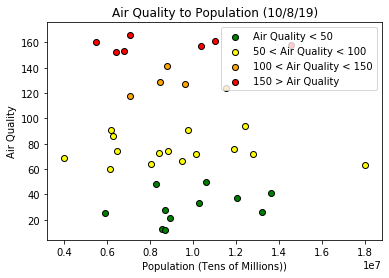

In [3]:
#Created a scatterplot comparing air quality to population size.
plt.scatter(good_air['Population'], good_air['Air Quality'], marker="o", facecolors="green", edgecolors="black", label = "Air Quality < 50")
plt.scatter(med_air['Population'], med_air['Air Quality'], marker="o", facecolors="yellow", edgecolors="black", label = "50 < Air Quality < 100")
plt.scatter(bad_air['Population'], bad_air['Air Quality'], marker="o", facecolors="orange", edgecolors="black", label = "100 < Air Quality < 150")
plt.scatter(terrible_air['Population'], terrible_air['Air Quality'], marker="o", facecolors="red", edgecolors="black", label = "150 > Air Quality")
plt.title("Air Quality to Population (10/8/19)")
plt.xlabel("Population (Tens of Millions))")
plt.ylabel("Air Quality")
plt.legend(loc="best")
plt.savefig("Output/InternationalAirQualitytoPopulation.png")

There doesn't seem to be much of a relationship between Air Quality and Population amongst the biggest cities.
For further study, we might want to check out the relationship between Air Quality and Population Density.

In [5]:
#Makes a heat map of locations by air quality
#This was working earlier ¯\_(ツ)_/¯
# import gmaps
gmaps.configure(api_key=gkey)
fig = gmaps.figure()
locations = pop_df[["Latitude", "Longitude"]]
heat_layer = gmaps.heatmap_layer(locations, weights=pop_df['Air Quality'], 
                                 dissipating=False, max_intensity=10,
                                 point_radius=3)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig


Figure(layout=FigureLayout(height='420px'))

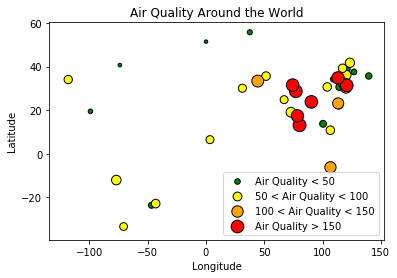

In [4]:
#Plots the Air Quality of cities based on their longitude and latitude, showing different sized and colored bubbles
#based on their air quality.
plt.scatter(good_air['Longitude'], good_air['Latitude'], s=good_air['Air Quality'], facecolors="green", edgecolors="black", label = "Air Quality < 50")
plt.scatter(med_air['Longitude'], med_air['Latitude'], s=med_air['Air Quality'], facecolors="yellow", edgecolors="black", label = "50 < Air Quality < 100")
plt.scatter(bad_air['Longitude'], bad_air['Latitude'], s=bad_air['Air Quality'], facecolors="orange", edgecolors="black", label = "100 < Air Quality < 150")
plt.scatter(terrible_air['Longitude'], terrible_air['Latitude'], s=terrible_air['Air Quality'], facecolors="red", edgecolors="black", label = "Air Quality > 150")
plt.title("Air Quality Around the World")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="best")
plt.savefig("Output/Long_Lat_Air_Quality_ajy.png")

As we can see, most of the biggest cities in the world are in Asia, as well as most of the large cities with bad
air quality. If we had more time, I would like to expand the number of cities we look at to see if this air quality
trend holds up with a bigger sample.

In [1]:
#NOTE: I could not get geopandas to work in jupyter notebook, so I created a file that does it in python (geo.py)
#For my plot, you can see it there or check the output.